## **Lending Club Case Study**

In [2]:
#Importing all libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### **Data Sourcing**

In [3]:
#Load the dataset
loanDf = pd.read_csv("loan.csv")

In [4]:
#Information about a loan dataset including the index dtype and columns, non-null values and memory usage.
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a loan dataset's distribution, excluding ``NaN`` values.
loanDf.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
# About shape & datatype of loan dataset columns
print(loanDf.shape)
print(loanDf.dtypes)

(39717, 111)
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### **Data Cleaning**

In [184]:
#Checking null values in dataframe
print(loanDf.isnull().sum())

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [7]:
#Drop Columns having all null values
loanDf.dropna(axis=1, how='all', thresh=None, subset=None, inplace=True)
#Shape of dataframe after removing null column
print(loanDf.shape)

(39717, 57)


In [8]:
#To make all columns visible
pd.options.display.max_columns=58

In [9]:
#Check no of null values in percentage
print((loanDf.isnull().sum()/len(loanDf))*100)
maxnullcolumn =((loanDf.isnull().sum()/len(loanDf))*100) 
columnstodelete = maxnullcolumn[maxnullcolumn > 60].index

#Drop column which has null value more than 
loanDf.drop(columnstodelete ,axis=1, inplace=True)

#Shape of dataframe after removing column having 70% value null
print(loanDf.shape)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [10]:
#Check columns having all single type or null values values

print("tax_liens",loanDf[(loanDf["tax_liens"].isnull())| (loanDf["tax_liens"] == 0.0)].shape)
print("pub_rec_bankruptcies",loanDf[(loanDf["pub_rec_bankruptcies"].isnull())| (loanDf["pub_rec_bankruptcies"] == 0.0)].shape)
print("delinq_amnt",loanDf[(loanDf["delinq_amnt"].isnull())| (loanDf["delinq_amnt"] == 0)].shape)
print("chargeoff_within_12_mths",loanDf[(loanDf["chargeoff_within_12_mths"].isnull())| (loanDf["chargeoff_within_12_mths"] == 0.0)].shape)
print("acc_now_delinq",loanDf[(loanDf["acc_now_delinq"].isnull())| (loanDf["acc_now_delinq"] == 0)].shape)
print("application_type",loanDf.application_type.value_counts())
print("policy_code",loanDf.policy_code.value_counts())
print("collections_12_mths_ex_med",loanDf[(loanDf["collections_12_mths_ex_med"].isnull())| (loanDf["collections_12_mths_ex_med"] == 0.0)].shape)
print("initial_list_status",loanDf.initial_list_status.value_counts())
print("pymnt_plan",loanDf.pymnt_plan.value_counts())


tax_liens (39717, 54)
pub_rec_bankruptcies (38036, 54)
delinq_amnt (39717, 54)
chargeoff_within_12_mths (39717, 54)
acc_now_delinq (39717, 54)
application_type INDIVIDUAL    39717
Name: application_type, dtype: int64
policy_code 1    39717
Name: policy_code, dtype: int64
collections_12_mths_ex_med (39717, 54)
initial_list_status f    39717
Name: initial_list_status, dtype: int64
pymnt_plan n    39717
Name: pymnt_plan, dtype: int64


In [11]:
#Droping columns having all single type or null values values
columnstodelete=['tax_liens','pub_rec_bankruptcies','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan']
loanDf.drop(columnstodelete ,axis=1, inplace=True)

In [12]:
#Identifing Customer Behaviour Variables
loanDf.columns
custBehvVar = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d']

# Removing customer behaviour variables columns as customer behaviour variables are not available at time of loan application ,
# and thus they cannot be used as predictors for loan approvals
loanDf.drop(custBehvVar ,axis=1, inplace=True)

In [13]:
#Shape of dataframe after removing customer behaviour variables
print(loanDf.shape)

(39717, 24)


In [14]:
#Removing column 'url' and 'desc' as it does not have any role in pridicting to approve for loan

loanDf.drop(['url','desc'] ,axis=1, inplace=True)

#Shape of dataframe after removing above columns
print(loanDf.shape)

(39717, 22)


In [15]:
#Check null values in columns
print((loanDf.isnull().sum()))

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_title              2459
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
title                    11
zip_code                  0
addr_state                0
dti                       0
dtype: int64


In [16]:
# As it is visible that three existing columns still are having  null values namely 
#1. emp_title
#2. emp_length
#3. title

#Both emp_title and emp_length entries are neccessary details, so removing rows having null values in these columns
loanDf = loanDf[~(loanDf['emp_title'].isnull())]
loanDf = loanDf[~(loanDf['emp_length'].isnull())]

#removing title column as it is not contributing in analysis for loan approval
loanDf.drop(['title'] ,axis=1, inplace=True)

In [17]:
#Shape of dataframe after removing above rows/columns
print(loanDf.shape)

(37202, 21)


In [18]:
#Removing 'month' from term colmn and '%' from int_rate column to make it easier to analyze and also changing its data type
loanDf['term'] = loanDf.term.str.replace('months','')
loanDf['term'] = loanDf['term'].astype(int)
loanDf['int_rate'] = loanDf.int_rate.str.replace('%','')
loanDf['int_rate'] = loanDf['int_rate'].astype(float)

In [19]:
#renaming above column to make it easier to understand values
loanDf.rename({'term': 'term_in_month', 'int_rate': 'int_rate_in_per'}, axis=1, inplace=True)

In [20]:
# Dropping rows where Loan status is 'Current' because 
# these are not supporting in analysis as these are neither fully paid nor defaulted
loanDf = loanDf[loanDf['loan_status'] != 'Current']

In [21]:
#Shape of dataframe after removing above row
print(loanDf.shape)

(36136, 21)


### **Data Analyzation**

<AxesSubplot:xlabel='annual_inc'>

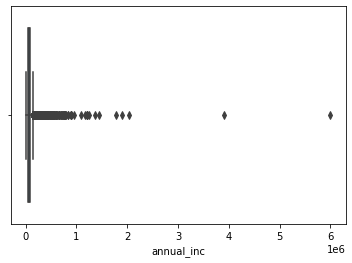

In [22]:
#Analyzing annual income ,Detecting outliers 
sns.boxplot(loanDf['annual_inc'])

In [43]:
loanDf['annual_inc'].describe()

count     33990.000000
mean      60472.589390
std       26395.098884
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       76942.000000
max      132444.000000
Name: annual_inc, dtype: float64

In [47]:
#detecting and removing outliers
Q1 = loanDf['annual_inc'].quantile(0.25)
Q3 = loanDf['annual_inc'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cond1 = loanDf['annual_inc'] < (Q1 - 1.5 * IQR)
cond2 = loanDf['annual_inc'] > (Q3 + 1.5 * IQR)

loanDf = loanDf[~((cond1== True) | (cond2==True))]

36900.0


<AxesSubplot:xlabel='annual_inc'>

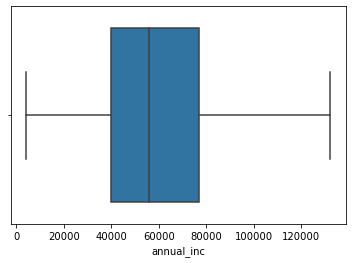

In [49]:
#After removing outliers
sns.boxplot(loanDf['annual_inc']) 

(-1.1271458126994447,
 1.1041726780724397,
 -1.1124744002082723,
 1.1005940451905338)

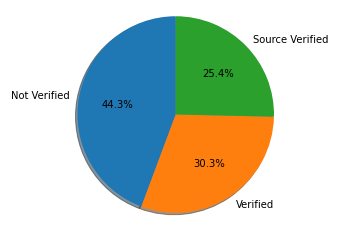

In [27]:
#Analyzing verification status of borrower where loan is either fully paid or charged off 
varPer = (loanDf['verification_status'].value_counts()/len(loanDf))*100 
labels = varPer.index
plt.pie(varPer, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90 ,)
plt.axis('equal')

Fully Paid     14562
Charged Off     2543
Name: loan_status, dtype: int64

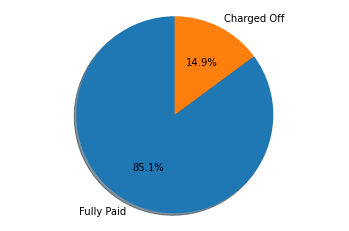

In [105]:
#Count of Fully Paid and Charged Off borrower where sanctioned loan is less than loan amount requested
df1 = loanDf[loanDf.loan_amnt>loanDf.funded_amnt_inv]
varPer = (df1.loan_status.value_counts()/len(df1))*100 
labels = varPer.index
plt.pie(varPer, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')

<AxesSubplot:xlabel='verification_status', ylabel='funded_amnt_inv'>

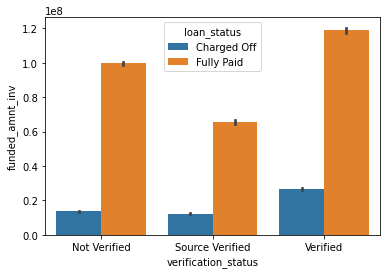

In [104]:
#Analyze borrower verification status and loan amount sanctioned by investor wrt loan status 
dfver= loanDf[['verification_status','loan_status','funded_amnt_inv']].sort_values(['loan_status','verification_status'])
sns.barplot(x='verification_status', y='funded_amnt_inv', hue="loan_status", data=dfver, estimator=np.sum )

#Below plot shows that borrower verification is not having much impact on its loan status. As borrower which are verified are having maximum charged off loans

<AxesSubplot:xlabel='count', ylabel='purpose'>

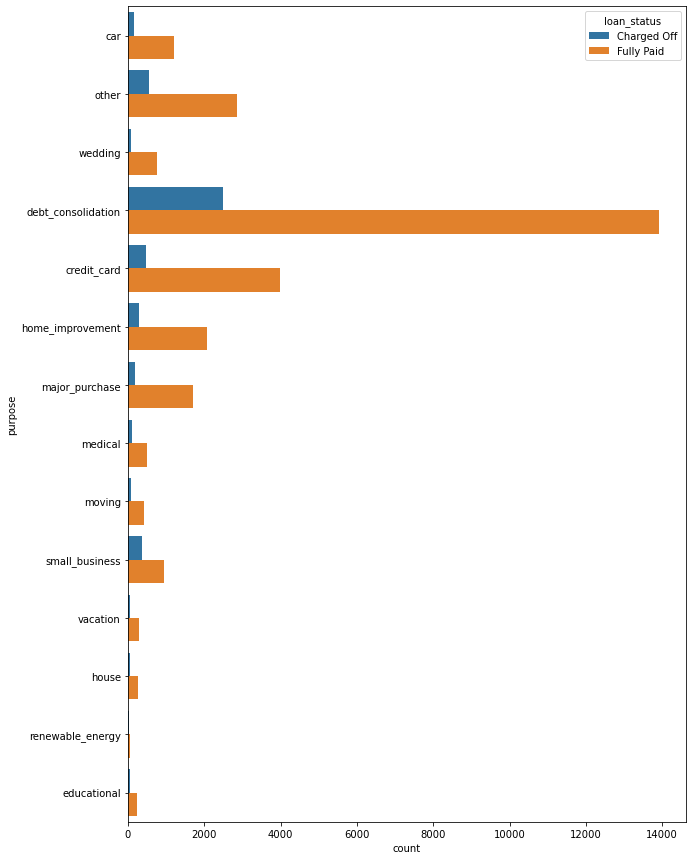

In [29]:
#Analysis of loan purpose
plt.figure(figsize=(10,15))
sns.countplot(y="purpose",data=loanDf,hue='loan_status')

#Below plot shows that most of the loan taken for debt consolidation purpose are fully paid
#For renewable energy purpose very less amount of loan is proposed
#Maximum number of charged off loan is also for debt consolidation

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

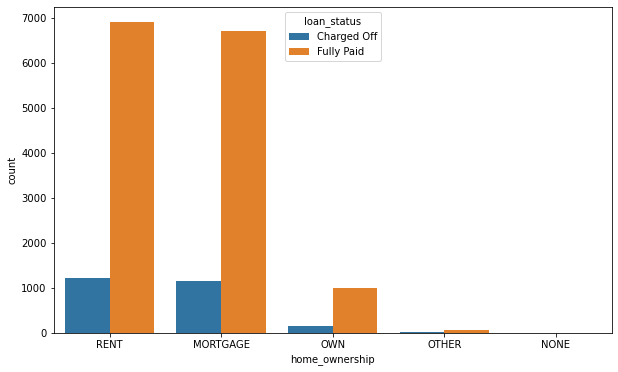

In [30]:
#Analyze home ownership wrt loan status
plt.figure(figsize=(10,6))
sns.countplot(x="home_ownership",data=df1,hue='loan_status')

#Below plot shows maximum number of charged off loan and fully paid loan is where borrower is living in rent
#Borrower who are having their own home is having minimum number of charged off loan

<AxesSubplot:xlabel='term_in_month', ylabel='count'>

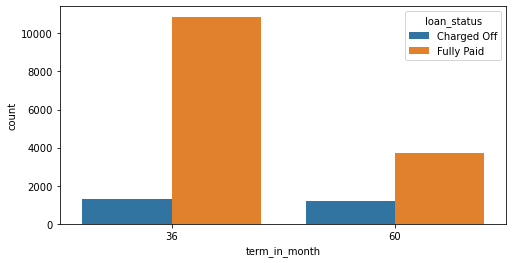

In [72]:
#Analyzing number of payments on the loan wrt loan status
plt.figure(figsize=(8,4))
sns.countplot(x="term_in_month",data=df1,hue='loan_status')

#Below plot shows that most of the loan which are having less number of payment are fully paid

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

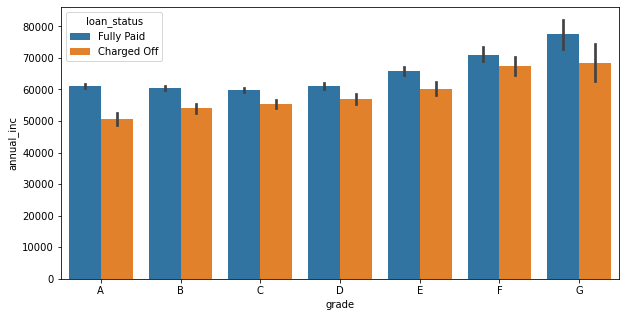

In [106]:
#Analyze borrower loan grade and annual income wrt loan status
plt.figure(figsize=(10,5))
sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=loanDf.sort_values(['grade']), estimator=np.mean )

#Below plot shows that borrower having loan grade G have maximum charged off loan and annual income
#Below plot shows that borrower having loan grade A have minimum no of charged off loan and annual income

<AxesSubplot:xlabel='issue_y', ylabel='int_rate_in_per'>

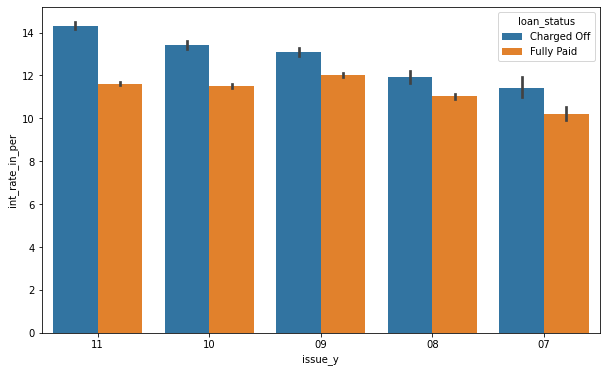

In [107]:
#Analyze loan interest rate and  issued year wrt loan status
plt.figure(figsize=(10,6))
#creating derived column for loan issued month and year
loanDf[["issue_m", "issue_y"]] =loanDf.issue_d.str.split("-", expand = True)
#plot 
sns.barplot(y='int_rate_in_per', x='issue_y', data =loanDf,hue='loan_status')

#Below graph shows that in year 2011 maximum number of loan is issued which are charged off
#In year 2009 maximum number of loan is issued which are fully paid
# Overall maximum loan issued in year 2011 and minum in 2007

<AxesSubplot:xlabel='loan_amnt', ylabel='emp_length'>

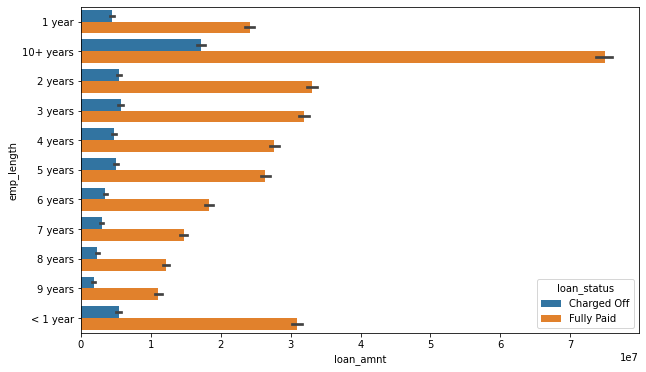

In [91]:
#Analyzing effect of number of years of experience of a person on loan status
plt.figure(figsize=(10,6))
df3 = loanDf[['loan_amnt','emp_length','loan_status']].sort_values(['emp_length','loan_status'])
sns.barplot(x='loan_amnt', y='emp_length', hue="loan_status", data=df3 , estimator=np.sum) 

#Below plot shows borrower having more than 10 years experience have maximunm number of loan fully paid
#Below plot also shows charged off loan ratio is also decreasing by years of experience

In [111]:
#Correlation matrix
loanDf.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_month,int_rate_in_per,installment,annual_inc,dti
id,1.000000,0.993585,0.117964,0.129084,0.232715,0.174291,0.053865,0.073419,0.038393,0.092847
member_id,0.993585,1.000000,0.118296,0.128620,0.243359,0.193394,0.050775,0.068494,0.040173,0.094057
loan_amnt,0.117964,0.118296,1.000000,0.981828,0.935144,0.348886,0.286350,0.930675,0.391608,0.093864
funded_amnt,0.129084,0.128620,0.981828,1.000000,0.953174,0.328379,0.291960,0.956436,0.387538,0.093034
funded_amnt_inv,0.232715,0.243359,0.935144,0.953174,1.000000,0.349000,0.284518,0.899764,0.370921,0.101098
term_in_month,0.174291,0.193394,0.348886,0.328379,0.349000,1.000000,0.435471,0.088811,0.078462,0.081245
int_rate_in_per,0.053865,0.050775,0.286350,0.291960,0.284518,0.435471,1.000000,0.264149,0.042527,0.115139
installment,0.073419,0.068494,0.930675,0.956436,0.899764,0.088811,0.264149,1.000000,0.385373,0.082601
annual_inc,0.038393,0.040173,0.391608,0.387538,0.370921,0.078462,0.042527,0.385373,1.000000,-0.071886
dti,0.092847,0.094057,0.093864,0.093034,0.101098,0.081245,0.115139,0.082601,-0.071886,1.000000


<AxesSubplot:>

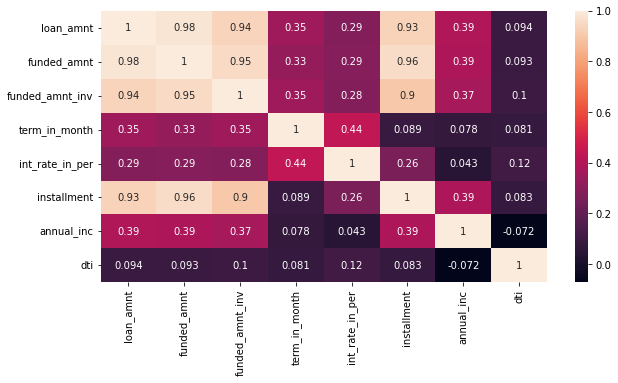

In [110]:
#Heatmap to display relation between differnt fields of loan
dfCorr = loanDf[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term_in_month', 'int_rate_in_per', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose','dti', 'issue_m', 'issue_y']]
plt.figure(figsize=(10,5))
sns.heatmap(dfCorr.corr(),  annot = True)
# From below plot it is clear that - 
#1. Loan amount ,funded amount and amount funded by investor are highly correlated
#2. Annual income and interest rate are very less correlated
#3. Annual income and dti are negatively/inversely correlated